In [ ]:
datos = pd.read_csv("/content/data/datos_sin_atipicos.zip")


In [ ]:
# Librerias para manipulacion de Data y Gráficas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Preparación de datos y configuración de pipeline para Machine Learning con scikit-learn
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

#models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
#for classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#for regression
from sklearn.metrics import r2_score

In [ ]:
datos.head()

tipo  presion_alterial_alta  colesterol_alto   imc  enfermedad_cardiaca  \
0   0.0                    1.0              1.0  40.0                  0.0   
1   0.0                    0.0              0.0  25.0                  0.0   
2   0.0                    1.0              1.0  28.0                  0.0   
3   0.0                    1.0              0.0  27.0                  0.0   
4   0.0                    1.0              1.0  24.0                  0.0   

   hace_ejercicio  come_fruta  come_vegetales  edad  dificultad_caminar  \
0             0.0         0.0             1.0   9.0                 1.0   
1             1.0         0.0             0.0   7.0                 0.0   
2             0.0         1.0             0.0   9.0                 1.0   
3             1.0         1.0             1.0  11.0                 0.0   
4             1.0         1.0             1.0  11.0                 0.0   

   genero  fuma  
0     0.0   1.0  
1     0.0   1.0  
2     0.0   0.0  
3     0.0   0.0  
4     0.0   0.0

In [ ]:
datos.shape

(243833, 12)

Nota:

recall(sensibility): evalua los verdaderos positivos
specificity: valuar qué tan bien un modelo evita falsos positivos

En multiclase:
Se calcula para cada clase, tratando esa clase como la "positiva" y las demás como "negativas".
Por eso, puedes tener una especificidad alta para una clase aunque el modelo nunca la prediga, porque nunca la confunde con otra (aunque tampoco la acierte).

 El recall te dice qué tan bien el modelo es capaz de encontrar todos los casos reales de una clase.

 El F1-score te da una única métrica que equilibra cuántas predicciones fueron correctas (precisión) y cuántos casos reales fueron detectados (recall).

# Modelo 1


In [ ]:
#Selección de la caracteristica o función objetivo y el resto de los datos
X = datos.drop("tipo",axis=1)
y = datos['tipo']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7) #aca se hacen todas las particiones
#70%   , 30%   , 80%    , 20%
#siendo 70 y 80 datos de entrenamiento y 30 y 20 datos de testeo

In [ ]:
'''Acá se está creando un modelo de regresión logística utilizando LogisticRegression de la biblioteca scikit-learn.
max_iter=1000: Estableces el número máximo de iteraciones para que el modelo pueda converger (es decir, encontrar los mejores coeficientes para los datos). Esto es útil si tienes un conjunto de datos complejo o grandes cantidades de datos.'''
model = LogisticRegression(max_iter=1000)#esa cantidad de iteraciones son las famosas epocas.


In [ ]:
model.fit(X_train,y_train) #aca entrenamos el modelo

LogisticRegression(max_iter=1000)

In [ ]:
'''Utilizar el modelo entrenado (model) para predecir las etiquetas (tipo) para el conjunto de datos de prueba (X_test).
Genera un array (y_predict) que contiene las predicciones del modelo (0,1,2), basado en las características presentes en X_test.'''
y_predict = model.predict(X_test)

The accuracy of Logistic Regression is 0.8548


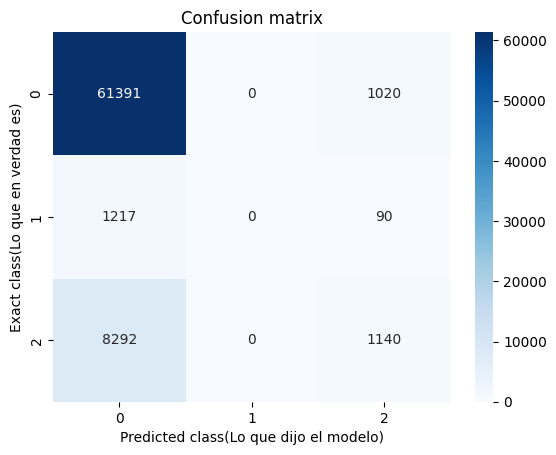

In [ ]:
#evaluación del modelo
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of Logistic Regression is {:.4f}'.format(accuracy))


confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class(Lo que dijo el modelo)')
plt.ylabel('Exact class(Lo que en verdad es)');

serie = pd.Series(accuracy,index=['LogisticRegression'])
accuracy_Logmodel = pd.DataFrame({'accuracy':serie})

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("\nClassification Report:\n", classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
num_classes = cm.shape[0]

specificities = []

for i in range(num_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)
    print(f"Specificity for class {i}: {specificity:.4f}")
print()

Accuracy: 0.8548325358851675

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     62411
         1.0       0.00      0.00      0.00      1307
         2.0       0.51      0.12      0.20      9432

    accuracy                           0.85     73150
   macro avg       0.46      0.37      0.37     73150
weighted avg       0.80      0.85      0.81     73150

Specificity for class 0: 0.1145
Specificity for class 1: 1.0000
Specificity for class 2: 0.9826



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Aunque el modelo alcanza un accuracy alto de 85.5%, su desempeño es altamente desbalanceado: predice con gran precisión la clase 0 (recall = 98%, F1 = 0.92), pero ignora completamente la clase 1 (recall y F1 = 0.00) y tiene un rendimiento muy bajo en la clase 2 (recall = 12%, F1 = 0.20). Las especificidades son altas para las clases 1 y 2 porque el modelo casi nunca las predice, lo que genera una falsa sensación de buen rendimiento. El macro F1-score es apenas 0.37, revelando un mal desempeño global si consideramos todas las clases por igual. En resumen, el modelo es confiable solo para la clase 0 y debe mejorarse urgentemente para cubrir las clases minoritarias.

# Modelo 2


In [ ]:
X = datos.drop("tipo",axis=1)
y = datos['tipo']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [ ]:
model = KNeighborsClassifier() #con esto basta para entrenar el modelo gracias a sklearn
model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_predict = model.predict(X_test)

The accuracy of KNeighborsClassifier is 0.8393


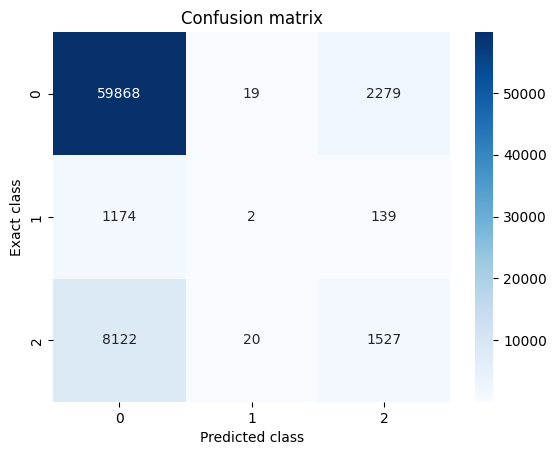

In [ ]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of KNeighborsClassifier is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['KNeighborsClassifier'])
accuracy_KNmodel = pd.DataFrame({'accuracy':serie})

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("\nClassification Report:\n", classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
num_classes = cm.shape[0]

specificities = []

for i in range(num_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)
    print(f"Specificity for class {i}: {specificity:.4f}")
print()

Accuracy: 0.8393301435406698

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     62166
         1.0       0.05      0.00      0.00      1315
         2.0       0.39      0.16      0.22      9669

    accuracy                           0.84     73150
   macro avg       0.43      0.37      0.38     73150
weighted avg       0.79      0.84      0.80     73150

Specificity for class 0: 0.1537
Specificity for class 1: 0.9995
Specificity for class 2: 0.9619



Aunque el **accuracy es alto (83.9%)**, el modelo está claramente **desequilibrado**: predice muy bien la clase 0 (recall = 96%, F1 = 0.91), pero **ignora prácticamente la clase 1** (recall = 0.00) y tiene bajo rendimiento en la clase 2 (recall = 16%, F1 = 0.22). El **macro F1-score es solo 0.38**, lo que refleja mal desempeño si todas las clases importan por igual. Además, la **especificidad para la clase 0 es muy baja (15.4%)**, lo que indica que el modelo clasifica erróneamente muchas instancias como clase 0. En resumen, este modelo **se apoya casi totalmente en la clase mayoritaria**, siendo poco útil si se necesita identificar correctamente las clases 1 y 2.

# Modelo 3

In [ ]:
X = datos.drop("tipo",axis=1)
y = datos['tipo']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_predict = model.predict(X_test)

The accuracy of Decision Tree is 0.8253


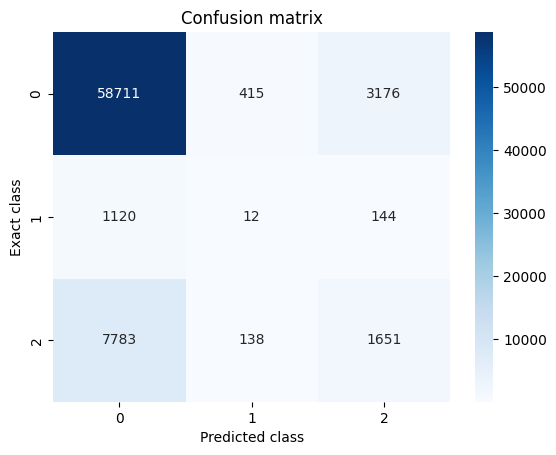

In [ ]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of Decision Tree is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['DecisionTreeClassifier'])
accuracy_DTmodel = pd.DataFrame({'accuracy':serie})

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("\nClassification Report:\n", classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
num_classes = cm.shape[0]

specificities = []

for i in range(num_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)
    print(f"Specificity for class {i}: {specificity:.4f}")
print()

Accuracy: 0.8253451811346548

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.94      0.90     62302
         1.0       0.02      0.01      0.01      1276
         2.0       0.33      0.17      0.23      9572

    accuracy                           0.83     73150
   macro avg       0.41      0.37      0.38     73150
weighted avg       0.78      0.83      0.80     73150

Specificity for class 0: 0.1793
Specificity for class 1: 0.9923
Specificity for class 2: 0.9478



Este modelo presenta un **accuracy de 82.5%**, pero con un desempeño claramente **desequilibrado**: la clase 0 es muy bien detectada (recall = 94%, F1 = 0.90), mientras que la clase 1 está prácticamente ignorada (recall = 1%, F1 = 0.01) y la clase 2 tiene bajo rendimiento (recall = 17%, F1 = 0.23). El **macro F1-score es solo 0.38**, lo que indica un rendimiento pobre si se consideran todas las clases por igual. Las **especificidades altas en clases 1 y 2** reflejan que el modelo casi nunca predice esas clases, mientras que la **especificidad baja en la clase 0 (17.9%)** muestra que muchas otras clases están siendo clasificadas erróneamente como clase 0. En conjunto, el modelo **depende excesivamente de la clase mayoritaria** y requiere ajustes si se quiere mejorar la detección de clases minoritarias.